<a href="https://colab.research.google.com/github/Abdulaziz1607/Challenge_Data/blob/main/Pr%C3%A9diction_arriver_caserne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibli

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id_x_train ='1K6h-T_EIjWhQd-2dXHxw5V8uRS-Bb5rV'
id_x_test = '1cvI1-1HYFaY_Hq9yXhrQmA51yL8nJAvX'
id_y_train = '1p-0_Afr8nH9dIrr5zgHkmWQgjQ_XyELS'
id_x_train_add = '1CzNtovmNIzPJdjiWBzb1AzlAo-ob8ITb'
id_x_test_add = '1REClQVKaSGEXw4bYYcxMTSQUjj3y9eHN'

dl_x_train = drive.CreateFile({'id':id_x_train})
dl_x_train.GetContentFile('x_train.csv')
dl_x_test = drive.CreateFile({'id':id_x_test})
dl_x_test.GetContentFile('x_test.csv')
dl_y_train = drive.CreateFile({'id':id_y_train})
dl_y_train.GetContentFile('y_train.csv')
dl_x_test_add = drive.CreateFile({'id':id_x_test_add})
dl_x_test_add.GetContentFile('x_test_add.csv')
dl_x_train_add = drive.CreateFile({'id':id_x_train_add})
dl_x_train_add.GetContentFile('x_train_add.csv')

## ENS CHALLENGE


In [ ]:
import pickle

In [ ]:
import pandas as pd, matplotlib.pyplot as plt,numpy as np
from sklearn.model_selection import GridSearchCV,train_test_split
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [16, 10]

# Data reading and split Train/Validation/Test_
x_train = pd.read_csv('x_train.csv', sep=',')
y_train = pd.read_csv('y_train.csv', sep=',')
x_test = pd.read_csv('x_test.csv', sep=',')
x_train_add = pd.read_csv('x_train_add.csv', sep=',')
x_test_add = pd.read_csv('x_test_add.csv', sep=',')
x_test['delta position gps previous departure-departure'].fillna(0,inplace = True)
x_train['delta position gps previous departure-departure'].fillna(0,inplace = True)
y_train1 = y_train.copy()
y_train1.drop(['emergency vehicle selection'],axis=1,inplace=True)
x = pd.concat([x_train,y_train1],axis=1);
x.head()

,emergency vehicle selection,intervention,alert reason category,alert reason,intervention on public roads,floor,location of the event,longitude intervention,latitude intervention,emergency vehicle,emergency vehicle type,rescue center,selection time,date key sélection,time key sélection,status preceding selection,delta status preceding selection-selection,departed from its rescue center,longitude before departure,latitude before departure,delta position gps previous departure-departure,GPS tracks departure-presentation,GPS tracks datetime departure-presentation,OSRM response,OSRM estimated distance,OSRM estimated duration,delta selection-departure,delta departure-presentation,delta selection-presentation
0,5105452,13264186,3,2162,0,0,148.0,2.284796,48.879669,4511,VSAV BSPP,2447,2018-07-08 19:02:43.990,20180708,190243,Rentré,2027,1,2.288053,48.884698,0.0,"2.289000,48.885113;2.288861,48.884998;2.288000...",2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,"{""code"":""Ok"",""routes"":[{""geometry"":""}yjiH}x}L_...",952.5,105.8,86,324,410
1,4720915,12663715,3,2124,0,1,136.0,2.247464,48.818191,4327,PSE,2464,2018-01-04 09:02:59.470,20180104,90259,Rentré,28233,1,2.268519,48.823958,0.0,NaN,NaN,"{""code"":""Ok"",""routes"":[{""geometry"":""u|~hHy`zL_...",2238.5,243.2,164,297,461
2,5365374,13675521,3,2163,0,2,139.0,2.258328,48.836759,4509,VSAV BSPP,2438,2018-11-16 10:11:47.777,20181116,101147,Disponible,1981,0,2.272944,48.850498,33.0,"2.272972,48.850498;2.269056,48.847443;2.262611...",2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""_cdiHo}zLm...",3026.4,295.4,125,365,490
3,4741586,12695745,3,2162,0,0,136.0,2.393832,48.776526,5731,VSAV BSPP,2510,2018-01-15 00:38:46.820,20180115,3846,Rentré,1842,1,2.388940,48.787732,0.0,"2.394278,48.782112;2.393639,48.776833",2018-01-15 00:42:46;2018-01-15 00:43:58,"{""code"":""Ok"",""routes"":[{""geometry"":""sywhH_pqMy...",1934.2,166.6,168,160,328
4,5381209,13698743,3,2162,0,3,104.0,2.458610,48.875751,5623,VSAV BSPP,2478,2018-11-24 00:34:26.017,20181124,3426,Rentré,2716,1,2.439331,48.863814,0.0,"2.439472,48.863724;2.439583,48.863777;2.440917...",2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,"{""code"":""Ok"",""routes"":[{""geometry"":""wvfiHgn{Mj...",2706.7,262.6,138,523,661


In [ ]:
[aa,bb] = x_train.shape
[zz,ee] = x_test.shape

In [ ]:
x_train.loc[:,'repere']= np.zeros((aa,1))
x_test.loc[:,'repere']= np.zeros((zz,1))

In [ ]:
repere = x_train['repere']
for i in range(aa):
  repere[i]=i


In [ ]:
repere2 = x_test['repere']
for i in range(zz):
  repere2[i]=i


## Nettoyer les Données

Text(0.5, 1.0, 'delta1')

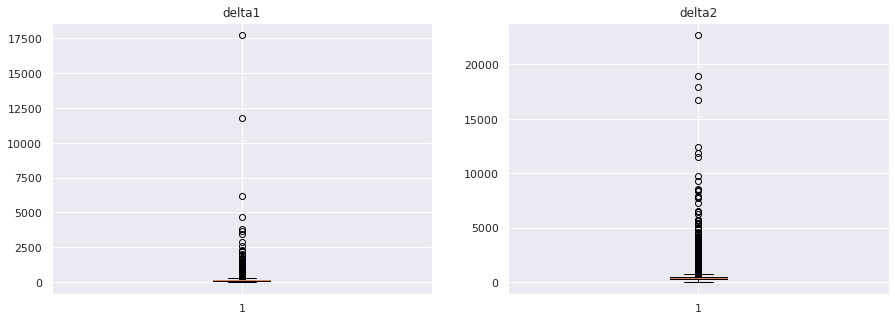

In [ ]:
fig, ax =plt.subplots(ncols=2,figsize=(15,5))
sns.set();
ax[1].boxplot(y_train['delta departure-presentation']);
ax[1].set_title('delta2')
ax[0].boxplot(y_train['delta selection-departure']);
ax[0].set_title('delta1')

In [ ]:
ajuste_y = y_train['delta selection-departure'].copy()
ajuste_y1 = y_train['delta departure-presentation'].copy()
quantile3=  np.quantile(y_train['delta selection-departure'],0.75)
quantile3_=  np.quantile(y_train['delta departure-presentation'],0.75)
[a]= ajuste_y.shape
list_sup= []

for i in range(a):
  if ajuste_y[i] > 2000 :
     list_sup.append(i)
  if ajuste_y1[i] > 3000:
     list_sup.append(i)


In [ ]:
ajuste_y.drop(list_sup,0,inplace = True)
ajuste_y1.drop(list_sup,0,inplace = True)
x_train.drop(list_sup,0,inplace = True)
x_train_add.drop(list_sup,0,inplace = True)



Text(0.5, 1.0, 'delta1')

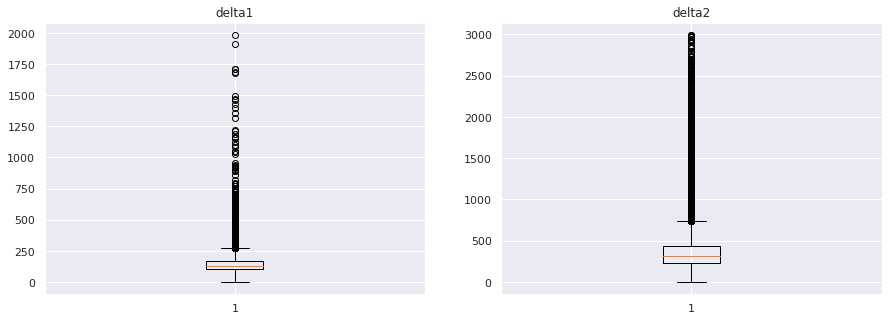

In [ ]:
fig, ax =plt.subplots(ncols=2,figsize=(15,5))
sns.set();
ax[1].boxplot(ajuste_y1);
ax[1].set_title('delta2')
ax[0].boxplot(ajuste_y);
ax[0].set_title('delta1')

In [ ]:
x_train.shape


(219236, 27)

Text(0.5, 1.0, 'delta1')

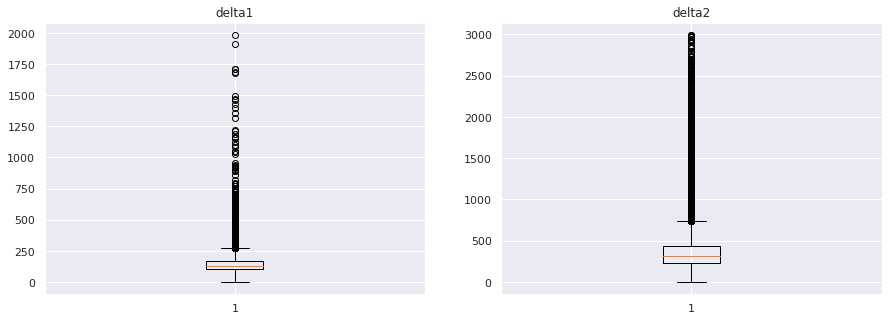

In [ ]:
fig, ax =plt.subplots(ncols=2,figsize=(15,5))
sns.set();
ax[1].boxplot(ajuste_y1);
ax[1].set_title('delta2')
ax[0].boxplot(ajuste_y);
ax[0].set_title('delta1')

In [ ]:
x_train["location of the event"].fillna(0,inplace = True)
x_test["location of the event"].fillna(0,inplace = True)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219236 entries, 0 to 219336
Data columns (total 27 columns):
emergency vehicle selection                        219236 non-null int64
intervention                                       219236 non-null int64
alert reason category                              219236 non-null int64
alert reason                                       219236 non-null int64
intervention on public roads                       219236 non-null int64
floor                                              219236 non-null int64
location of the event                              219236 non-null float64
longitude intervention                             219236 non-null float64
latitude intervention                              219236 non-null float64
emergency vehicle                                  219236 non-null int64
emergency vehicle type                             219236 non-null object
rescue center                                      219236 non-null int64
select

## Etudier la corrélation entre les différentes variables

In [ ]:
temp__ = pd.concat([x_train['selection time'],x_train['GPS tracks datetime departure-presentation'],x['delta selection-departure']],axis=1)
temp__.head()

,selection time,GPS tracks datetime departure-presentation,delta selection-departure
0,2018-07-08 19:02:43.990,2018-07-08 19:04:43;2018-07-08 19:05:55;2018-0...,86
1,2018-01-04 09:02:59.470,NaN,164
2,2018-11-16 10:11:47.777,2018-11-16 10:14:31;2018-11-16 10:15:43;2018-1...,125
3,2018-01-15 00:38:46.820,2018-01-15 00:42:46;2018-01-15 00:43:58,168
4,2018-11-24 00:34:26.017,2018-11-24 00:37:10;2018-11-24 00:38:22;2018-1...,138


In [ ]:
vitesse = pd.DataFrame(x_train['OSRM estimated distance']/x_train['OSRM estimated duration'])
vitesse1 = pd.DataFrame(x_train['OSRM estimated distance']/x['delta departure-presentation'])
ratiotemps = pd.DataFrame(x['delta departure-presentation']/x_train['OSRM estimated duration'])
v = pd.concat([vitesse,vitesse1,ratiotemps],axis=1)
v1 =ratiotemps[:10000]
ratiotemps.mean()
#ratiotemps.std()

0    1.857407
dtype: float64

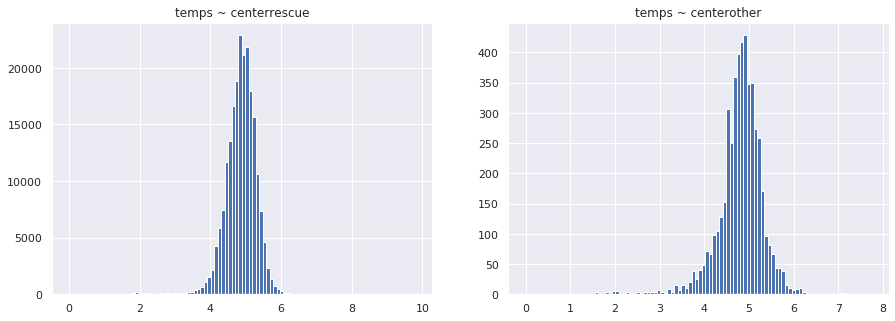

In [ ]:
depa_rescucenter = x.loc[x['departed from its rescue center']==1]
depa_rescuother = x.loc[x['departed from its rescue center']==0]
fig, ax =plt.subplots(ncols=2,figsize=(15,5))
sns.set();
ax[0].set_title('temps ~ centerrescue');
ax[0].hist(np.log(depa_rescucenter['delta selection-departure']+1),bins =100);
ax[1].set_title('temps ~ centerother');
ax[1].hist(np.log(depa_rescuother['delta selection-departure']+1),bins =100);

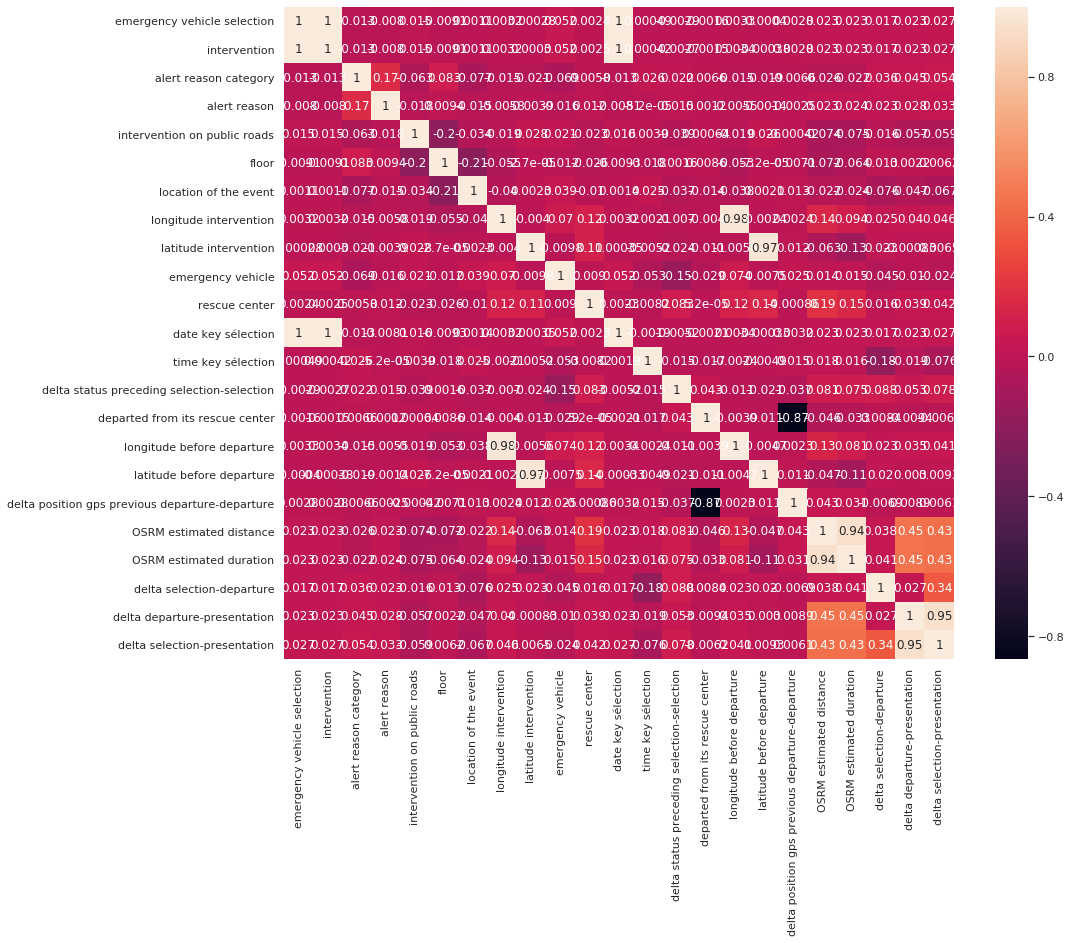

In [ ]:
cor = x.corr()
fig, ax =plt.subplots(figsize=(15,12))
sns.heatmap(cor,annot=True);

## Nouveaux features

### Clusters (Localisation)

longitude max 2.574861 et min 2.093597
latitude max 49.015576 et min 48.711723


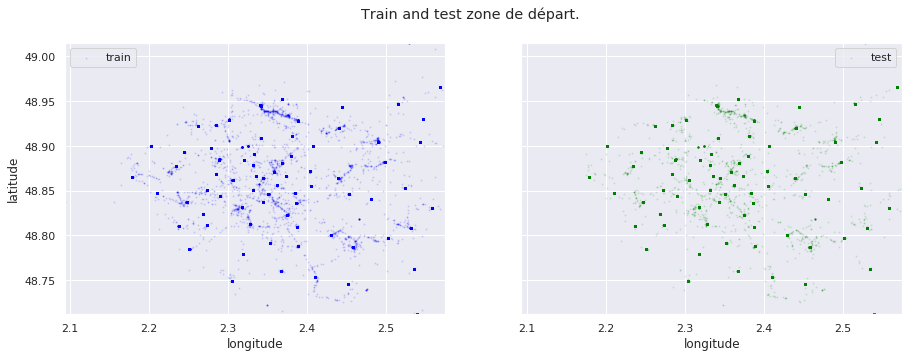

In [ ]:
N = 200000 # number of sample rows in plots
maxlon = np.max(x_train['longitude before departure'])
minlon = np.min(x_train['longitude before departure'])
maxlat = np.max(x_train['latitude before departure'])
minlat = np.min(x_train['latitude before departure'])
print('longitude max {} et min {}'.format(maxlon,minlon));
print('latitude max {} et min {}'.format(maxlat,minlat));
ville_long_bord = (minlon,maxlon);
ville_lat_bord = (minlat,maxlat);
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(15,5))
ax[0].scatter(x_train['longitude before departure'].values[:N], x_train['latitude before departure'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(x_test['longitude before departure'].values[:N], x_test['latitude before departure'].values[:N],
              color='green', s=1, label='test', alpha=0.1)
fig.suptitle('Train and test zone de départ.')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(ville_lat_bord)
plt.xlim(ville_long_bord)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
cluster=100
coords = np.vstack((x_train[['latitude before departure', 'longitude before departure']].values,
                    x_train[['latitude intervention', 'longitude intervention']].values,
                    x_test[['latitude before departure', 'longitude before departure']].values,
                    x_test[['latitude intervention', 'longitude intervention']].values))
sample_ = np.random.permutation(len(coords))[:N]
kmeans = KMeans(n_clusters=cluster).fit(coords[sample_])

In [ ]:
x_train.loc[:, 'depart_cluster'] = kmeans.predict(x_train[['latitude before departure', 'longitude before departure']])
x_train.loc[:, 'inter_cluster'] = kmeans.predict(x_train[['latitude intervention', 'longitude intervention']])
x_test.loc[:, 'depart_cluster'] = kmeans.predict(x_test[['latitude before departure', 'longitude before departure']])
x_test.loc[:, 'inter_cluster'] = kmeans.predict(x_test[['latitude intervention', 'longitude intervention']])

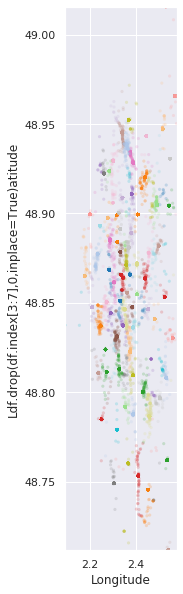

In [ ]:
fig__, ax__ = plt.subplots(figsize=(2,10))
ax__.scatter(x_train['longitude before departure'].values[:N], x_train['latitude before departure'].values[:N], s=10, lw=0,
           c=x_train.depart_cluster[:N].values, cmap='tab20', alpha=0.2)
ax__.set_xlim(ville_long_bord)
ax__.set_ylim(ville_lat_bord)
ax__.set_xlabel('Longitude')
ax__.set_ylabel('Ldf.drop(df.index[3:7],0,inplace=True)atitude')
plt.show()

In [ ]:
coupleD1  = np.zeros((cluster,cluster))
couple1D1  = np.zeros((cluster,cluster))
coupleD2  = np.zeros((cluster,cluster))
couple1D2  = np.zeros((cluster,cluster))
for i in range(cluster):
    for j in range(cluster):
        a = x_train['depart_cluster'] == i
        b = x_train['inter_cluster'] == j
        y = y_train[a & b]
        coupleD1[i,j]= y['delta selection-departure'].median()
        couple1D1[i,j]= y['delta selection-departure'].mean()
        coupleD2[i,j]= y['delta departure-presentation'].median()
        couple1D2[i,j]= y['delta departure-presentation'].mean()


In [ ]:
coupleD2.shape

In [ ]:
#pd.DataFrame(couple1/couple) ration median /
[m, n] = x_train.shape
x_train.loc[:,'median_time_cluster_delat1']=np.zeros((m,1))
x_train['median_time_cluster_delat1']=coupleD1[x_train['depart_cluster'],x_train['inter_cluster']]
[m, n] = x_test.shape
x_test.loc[:,'median_time_cluster_delat1']=np.zeros((m,1))
x_test['median_time_cluster_delat1']=coupleD1[x_test['depart_cluster'],x_test['inter_cluster']]

In [ ]:
[m, n] = x_train.shape
x_train.loc[:,'median_time_cluster_delat2']=np.zeros((m,1))
x_train['median_time_cluster_delat2']=coupleD2[x_train['depart_cluster'],x_train['inter_cluster']]
[m, n] = x_test.shape
x_test.loc[:,'median_time_cluster_delat2']=np.zeros((m,1))
x_test['median_time_cluster_delat2']=coupleD2[x_test['depart_cluster'],x_test['inter_cluster']]

In [ ]:
a = y_train['delta selection-departure']/x_train['median_time_cluster_delat2']
a.mean()

In [ ]:
[p,q] = x_test.shape
median1 = x_test['median_time_cluster_delat1']
median2 = x_test['median_time_cluster_delat2']
for i in range(p):
  if np.isnan(median1[i]) : 
    median1[i]= y_train['delta selection-departure'].median()
  if np.isnan(median2[i]) : 
    median2[i]= y_train['delta departure-presentation'].median()
  
x_test['median_time_cluster_delat1'] = median1
x_test['median_time_cluster_delat2'] = median2

In [ ]:
x_test.info()

### DateTime


In [ ]:
x_train["selection time"]

In [ ]:
[m, n ] = x_train.shape
time_3 = x_train['selection time']

temps = dt.datetime.strptime(time_3[1], '%Y-%m-%d %H:%M:%S.%f')
m

In [ ]:
[m1, n1 ] = x_train.shape
time_3 = x_train['selection time']

heure = np.zeros((m1,1))
jour = np.zeros((m1,1))
month = np.zeros((m1,1))
for i in range(300):
   temps = dt.datetime.strptime(time_3[i], '%Y-%m-%d %H:%M:%S.%f')
   heure[i] = temps.hour
   jour[i] = temps.weekday()
   month[i] = temps.month

In [ ]:
[m, n ] = x_test.shape
time_2 = x_test['selection time']
heure2 = np.zeros((m,1))
jour2 = np.zeros((m,1))
month2 = np.zeros((m,1))
for i in range(m):
    temps = dt.datetime.strptime(time_2[i], '%Y-%m-%d %H:%M:%S.%f')
    heure2[i] = temps.hour
    jour2[i] = temps.weekday()
    month2[i] = temps.month

In [ ]:
x_train.loc[:, 'hours'] = heure
x_test.loc[:, 'hours'] = heure2

x.loc[:, 'hours'] = heure
x.loc[:, 'day'] = jour

x_train.loc[:, 'day'] = jour
x_test.loc[:, 'day'] = jour2


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='hours', y='delta departure-presentation', data = x); 

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='hours', y='delta selection-departure', data = x); 

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='day', y='delta departure-presentation', data = x); 

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='day', y='delta selection-departure', data = x); 

In [ ]:
[a,b] = x_train.shape
season = np.zeros((a,1))
for i in range(a):
  if month[i] == 12 or month[i] == 1 or month[i] == 2:
    season[i] = 4
  if month[i] == 3 or month[i] == 4 or month[i] == 5:
    season[i] = 1
  if month[i] == 6 or month[i] == 7 or month[i] == 8:
    season[i] = 2
  if month[i] == 9 or month[i] == 10 or month[i] == 11:
    season[i] = 3



In [ ]:
x.loc[:, 'season'] = season

In [ ]:
[a1,b] = x_test.shape
season2 = np.zeros((a1,1))
for i in range(a1):
  if month2[i] == 12 or month[i] == 1 or month[i] == 2:
    season2[i] = 4
  if month2[i] == 3 or month[i] == 4 or month[i] == 5:
    season2[i] = 1
  if month2[i] == 6 or month[i] == 7 or month[i] == 8:
    season2[i] = 2
  if month2[i] == 9 or month[i] == 10 or month[i] == 11:
    season2[i] = 3


In [ ]:
x_train.loc[:, 'saison'] = season
x_test.loc[:, 'saison'] = season2

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='season', y='delta selection-departure', data = x); 


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='season', y='delta departure-presentation', data = x); 


### Distance manhattan/harversine

In [ ]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


In [ ]:
x_train.loc[:, 'distance_haversine'] = haversine_array(x_train['latitude before departure'].values, x_train['longitude before departure'].values, x_train['latitude intervention'].values, x_train['longitude intervention'].values)
x_train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(x_train['latitude before departure'].values, x_train['longitude before departure'].values, x_train['latitude intervention'].values,x_train['longitude intervention'].values)
x_train.loc[:, 'direction'] = bearing_array(x_train['latitude before departure'].values, x_train['longitude before departure'].values, x_train['latitude intervention'].values, x_train['longitude intervention'].values)

In [ ]:
x_test.loc[:, 'distance_haversine'] = haversine_array(x_test['latitude before departure'].values, x_test['longitude before departure'].values, x_test['latitude intervention'].values, x_test['longitude intervention'].values)
x_test.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(x_test['latitude before departure'].values, x_test['longitude before departure'].values, x_test['latitude intervention'].values,x_test['longitude intervention'].values)
x_test.loc[:, 'direction'] = bearing_array(x_test['latitude before departure'].values, x_test['longitude before departure'].values, x_test['latitude intervention'].values, x_test['longitude intervention'].values)

### D'autres variables explicatives

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='alert reason category', y='delta selection-departure', data = x); 


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='alert reason category', y='delta departure-presentation', data = x); 


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='location of the event', y='delta selection-departure', data = x); 


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='location of the event', y='delta departure-presentation', data = x); 


In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='emergency vehicle type', y='delta departure-presentation', data = x); 

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='emergency vehicle type', y='delta selection-departure', data = x); 

#### Autres

In [ ]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
new_type = Encoder.fit_transform(x_train['emergency vehicle type']) #Apprend et transforme les variables catégorielles
new_type1 = Encoder.fit_transform(x_test['emergency vehicle type']) #Apprend et transforme les variables catégorielles


In [ ]:
new_type = pd.DataFrame(new_type)
x_train['emergency vehicle type'] = new_type
new_type1 = pd.DataFrame(new_type1)
x_test['emergency vehicle type'] = new_type1

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='status preceding selection', y='delta selection-departure', data = x); 

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='status preceding selection', y='delta departure-presentation', data = x); 

In [ ]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
new_type_ = Encoder.fit_transform(x_train['status preceding selection']) #Apprend et transforme les variables catégorielles
new_type1_ = Encoder.fit_transform(x_test['status preceding selection']) #Apprend et transforme les variables catégorielles


In [ ]:
new_type_ = pd.DataFrame(new_type_)
x_train['status preceding selection'] = new_type_
new_type1_ = pd.DataFrame(new_type1_)
x_test['status preceding selection'] = new_type1_

In [ ]:
fig = plt.figure(figsize = (12,5))

sns.barplot(x='intervention on public roads', y='delta departure-presentation', data = x); 


## Repère colonnes

### Repère de base


In [ ]:
do_not_use_for_training_ = ['OSRM estimated duration','depart_cluster','inter_cluster','median_time_cluster_delat1',
                           'median_time_cluster_delat2','hours','GPS tracks departure-presentation',
                           'delta status preceding selection-selection','median_path_cluster',
                           'vitesse_avg_','alert reason category','date key sélection','selection time'
                           ,'emergency vehicle selection','intervention',
                           'alert reason',
                           'emergency vehicle',
                           'rescue center','date key sélection','time key sélection',
                           'delta position gps previous departure-departure',
                           'departed from its rescue center','time key sélection','day','selection time',
                          'OSRM response','GPS tracks datetime departure-presentation','latitude before departure',
                          'longitude before departure','status preceding selection','emergency vehicle type',
                           'latitude intervention','longitude intervention','location of the event']

### Variables explicatives utilisées pour selection_departure

In [ ]:

do_not_use_for_training1 = ['OSRM estimated duration','depart_cluster','inter_cluster','median_time_cluster_delat2',
                           'GPS tracks departure-presentation',
                           'delta status preceding selection-selection','median_path_cluster',
                           'vitesse_avg_','date key sélection','selection time'
                           ,'emergency vehicle selection','intervention',
                           'alert reason','saison','day','hours','emergency vehicle type','emergency vehicle',
                           'emergency vehicle','OSRM response','rescue center',
                           'date key sélection','time key sélection','median_time_cluster_delat1',
                           'delta position gps previous departure-departure','status preceding selection',
                           'time key sélection','selection time','median_time_cluster_delat2'
                          'OSRM response','GPS tracks datetime departure-presentation','latitude before departure',
                          'longitude before departure','distance_haversine','distance_dummy_manhattan','direction',
                           'latitude intervention','longitude intervention','OSRM estimated distance','repere','floor','Speed','intervention on public roads']
                                                  
var_exp1 = [f for f in x_train.columns if f not in do_not_use_for_training1]
var1 = pd.DataFrame(var_exp1)
var1.columns = ['variables explitives prises en compte']
var1

In [ ]:
j = x_train[var_exp1]
corrélation = pd.concat([j,y_train],axis=1)
sns.heatmap(corrélation.corr())

### Variables explicatives utilisées pour departure_presentation

In [ ]:

do_not_use_for_training = ['depart_cluster','inter_cluster','median_time_cluster_delat1',
                           'GPS tracks departure-presentation','distance_haversine','distance_dummy_manhattan',
                           'delta status preceding selection-selection','median_path_cluster',
                           'vitesse_avg_','alert reason category','date key sélection','selection time'
                           ,'emergency vehicle selection','intervention','emergency vehicle',
                           'alert reason','saison','floor','status preceding selection',
                           'rescue center','date key sélection','time key sélection',
                           'delta position gps previous departure-departure','longitude intervention',
                           'time key sélection','selection time','saison','day','hours','location of the event',
                          'OSRM response','GPS tracks datetime departure-presentation','emergency vehicle'
                          'status preceding selection','emergency vehicle type','median_time_cluster_delat2'
                           'latitude intervention','floor','direction','intervention on public roads',]
                                                  
var_exp = [f for f in x_train.columns if f not in do_not_use_for_training]
var = pd.DataFrame(var_exp)
var.columns = ['variables explitives prises en compte']
taille_var = len(var)
var

In [ ]:
j = x_train[var_exp]
corrélation = pd.concat([j,y_train],axis=1)
sns.heatmap(corrélation.corr())

## Modèle simple 

### Delta 1

In [ ]:
import xgboost as xgb
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
Xtr, X, ytr, y = train_test_split(x_train[var_exp1].values,ajuste_y, test_size=0.2, random_state=1987)

In [ ]:
model1 = ExtraTreesRegressor()
model1.fit(Xtr,ytr)
y_pred_ = model1.predict(X)

print('score valid 1 r2 {} '.format(r2_score(y,y_pred_)))
delta_selec_dep = model1.predict(x_test[var_exp1])
delta_selec_dep_ = pd.DataFrame(delta_selec_dep)

## Delta 2

In [ ]:
Xtr1, X_, ytr1, y_ = train_test_split(x_train[var_exp].values, ajuste_y1, test_size=0.2, random_state=1987)

In [ ]:
model = ExtraTreesRegressor()
model.fit(Xtr1,ytr1)
y_pred = model.predict(X_)
print('score valid 1 r2 {} '.format(r2_score(y_,y_pred)))
delta_dep_pre = model.predict(x_test[var_exp].values)
delta_dep_pre_ = pd.DataFrame(delta_dep_pre)

In [ ]:
print('score valid 1 r2 {} '.format(r2_score(y+y_,y_pred+y_pred_)))

In [ ]:
delta_selec_pre  = delta_selec_dep + delta_dep_pre
delta_selec_pre_ = pd.DataFrame(delta_selec_pre)

## Modèles XGBOOST 1


###  Prédiction du delta selection_departure

In [ ]:
x_train_voit = x_train.copy()
y_train_voit = y_train.copy()
x_test_voit = x_test.copy()
voiture = x_train_voit['emergency vehicle type']
voiture_test = x_test_voit['emergency vehicle type']
[taille_v, b] = x_train.shape
[taille_test_v, b] = x_test.shape
delta1 = y_train_voit['delta selection-departure']
max_voiture = np.max(voiture)+1
voiture_rapide = np.zeros((max_voiture,1))
voiture_lente = np.zeros((max_voiture,1))
seuil_rapide=180
for i in range(max_voiture):
  v = voiture == i
  if delta1[v].mean()>seuil_rapide :
    voiture_rapide[i]=i
  else:
    voiture_rapide[i] = 100

for i in range(max_voiture):
  v = voiture == i
  if delta1[v].mean()<=seuil_rapide :
    voiture_lente[i]=i
  else:
    voiture_lente[i] = 100
    voiture_rapide = pd.DataFrame(voiture_rapide)
voiture_rapide.columns = ['voiture_rapide']
voiture_rapide = voiture_rapide['voiture_rapide']
voiture_rapide = voiture_rapide.unique()

voiture_lente = pd.DataFrame(voiture_lente)
voiture_lente.columns = ['voiture_lente']
voiture_lente = voiture_lente['voiture_lente']
voiture_lente = voiture_lente.unique()
voiture_rapide = pd.DataFrame(voiture_rapide)
voiture_lente = pd.DataFrame(voiture_lente)
voiture_rapide = voiture_rapide.applymap(np.int64)
voiture_lente = voiture_lente.applymap(np.int64)
voiture_rapide.columns = ['voiture_rapide']
voiture_lente.columns = ['voiture_lente']
rapide_1 = voiture_rapide['voiture_rapide']
lente_1 = voiture_lente['voiture_lente']
liste_rapide = []
[taille_rapide,b] = voiture_rapide.shape
for i in range(taille_rapide):
  p = rapide_1[i]
  liste_rapide.append(p)
liste_lente = []
[taille_lente,b] = voiture_lente.shape
for i in range(taille_lente):
  q = lente_1[i]
  liste_lente.append(q)

rapide = voiture.isin(liste_rapide)
lente = voiture.isin(liste_lente)

rapide_test = voiture_test.isin(liste_rapide)
lente_test = voiture_test.isin(liste_lente)

x_train_rapide = x_train[rapide].copy()
x_train_lente = x_train[lente].copy()

x_test_rapide = x_test[rapide_test].copy()
x_test_lente = x_test[lente_test].copy()

y_train_rapide = ajuste_y[rapide].copy()
y_train_lente = ajuste_y[lente].copy()

####Voiture lente

In [ ]:
import xgboost as xgb
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
Xtr, X, ytr, y = train_test_split(x_train_lente[var_exp1].values, y_train_lente, test_size=0.2, random_state=1987)
X1, Xv, y1, yv = train_test_split(X, y, test_size=0.5, random_state=1987)

##### Normalisé

In [ ]:
x_train_choice1 = pd.DataFrame(Xtr)
x_train_choice2 = pd.DataFrame(Xv)
x_train_stat1 = x_train_choice1.describe()
x_train_stat1 = x_train_stat1.transpose()

In [ ]:
def norm(x):
  return (x - x_train_stat1['mean']) /x_train_stat1['std']
normed_train_data = norm(x_train_choice1)
normed_train_data2 = norm(x_train_choice2)


##### XGBOOST


##### Polynomial features


In [ ]:
test = x_test[var_exp1]
polynomial_features= PolynomialFeatures(degree=2)
x_train_transit_poly_ = polynomial_features.fit_transform(Xtr)
x_train_transit_poly2_ = polynomial_features.fit_transform(Xv)
x_train_transit_poly3_ = polynomial_features.fit_transform(X1)
x_train_transit_poly4_ = polynomial_features.fit_transform(test)


In [ ]:
dtrain1 = xgb.DMatrix(x_train_transit_poly_ , label=ytr)
dvalid1 = xgb.DMatrix(x_train_transit_poly2_, label=yv)
dvalid2_ = xgb.DMatrix(x_train_transit_poly3_, label=y1)
dtest1 = xgb.DMatrix(x_train_transit_poly4_)
watchlist = [(dtrain1, 'train'), (dvalid1, 'valid')]

params = {'eta': 0.3,'max_depth': 5,
          'lambda': 1., 'nthread': 5, 'booster' : 'gbtree',
            'eval_metric': 'rmse'}

In [ ]:
model = xgb.train(params, dtrain1, 60, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

y_predited_values1 = model.predict(dvalid1)
y_predited_values1_ = pd.DataFrame(y_predited_values1)

y_predited_values3 = model.predict(dvalid2_)
y_predited_values3_ = pd.DataFrame(y_predited_values3)

yv1_= pd.DataFrame(yv1)
y_2_ =pd.DataFrame(y_2)

print('score valid 1 r2 {} '.format(r2_score(yv1_,y_predited_values1)))
print('score valid 2 r2 {} '.format(r2_score(y_2_,y_predited_values3_)))

delta_dep_pre =  model.predict(dtest1)
delta_dep_pre_ = pd.DataFrame(delta_dep_pre)


###### Without polynomial features

In [ ]:
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dvalid2 = xgb.DMatrix(X1, label=y1)
dtest = xgb.DMatrix(x_test[var_exp1].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 4,
            'subsample': 0.8, 'lambda': 1., 'nthread': 6, 'booster' : 'gblinear', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [ ]:
model1 = xgb.train(params, dtrain, 60, watchlist, early_stopping_rounds=50,maximize=False, verbose_eval=10)

y_predited_values = model1.predict(dvalid)
y_predited_values_ = pd.DataFrame(y_predited_values)

y_predited_values2 = model1.predict(dvalid2)
y_predited_values2_ = pd.DataFrame(y_predited_values2)

yv_= pd.DataFrame(yv)
y1_=pd.DataFrame(y1)

print('score valid 1 r2 {} '.format(r2_score(yv_,y_predited_values_)))
print('score valid 2 r2 {} '.format(r2_score(y1_,y_predited_values2_)))


In [ ]:
#xgb.plot_importance(model1);
#plt.rcParams['figure.figsize'] = [5, 5]
#plt.show()

In [ ]:
plt.hist(y_train_lente,bins=150);
sns.set()

#### Voiture Rapide

In [ ]:
Xtr, X, ytr, y = train_test_split(x_train_rapide[var_exp1].values, y_train_rapide, test_size=0.2, random_state=1987)
X1, Xv, y1, yv = train_test_split(X, y, test_size=0.5, random_state=1987)

In [ ]:
dtrain = xgb.DMatrix(Xtr, label=ytr)
dvalid = xgb.DMatrix(Xv, label=yv)
dvalid2 = xgb.DMatrix(X1, label=y1)
dtest = xgb.DMatrix(x_test[var_exp1].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 4,
            'subsample': 0.8, 'lambda': 1., 'nthread': 6, 'booster' : 'gblinear', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [ ]:
model1 = xgb.train(params, dtrain, 60, watchlist, early_stopping_rounds=50,maximize=False, verbose_eval=10)

y_predited_values_rap = model1.predict(dvalid)
y_predited_values_rap_ = pd.DataFrame(y_predited_values_rap)

y_predited_values2_rap = model1.predict(dvalid2)
y_predited_values2_rap_ = pd.DataFrame(y_predited_values2_rap)

yv_= pd.DataFrame(yv)
y1_=pd.DataFrame(y1)

print('score valid 1 r2 {} '.format(r2_score(yv_,y_predited_values_rap_)))
print('score valid 2 r2 {} '.format(r2_score(y1_,y_predited_values2_rap_)))

In [ ]:
#plt.hist(y_train_rapide,bins=150);
#sns.set()

In [ ]:
print('score valid 1 r2 {} '.format(r2_score(yv_,y_predited_values_rap_)))

### Prédiction du delta departure-presentation

In [ ]:
Xtr1, X_, ytr1, y_ = train_test_split(x_train[var_exp].values, ajuste_y1, test_size=0.2, random_state=1987)
X_2, Xv1, y_2, yv1 = train_test_split(X_, y_, test_size=0.5, random_state=1987)

#### Réseaux de neurones

In [ ]:
fig_,ax_ = plt.subplots(figsize=(10,5))
x = np.linspace(2,8,num=100)
from scipy.stats import norm
normal = norm(np.log(y_train['delta departure-presentation']+1).mean(),np.log(y_train['delta departure-presentation']+1).std())
ax_.hist(np.log(y_train['delta departure-presentation']+1),bins=100,density=True);
ax_.plot(x,normal.pdf(x),color='red')


In [ ]:
[ j, k] = x_train.shape
class_delta2 = np.zeros((j,1))
pas_class= 0.5
y_class_log = np.log(y_train['delta departure-presentation']+1)
y_class_log_mean = np.log(y_train['delta departure-presentation']+1).mean()
for i in range(j):
  if y_class_log[i] < y_class_log_mean - pas_class :
    class_delta2[i] = -1
  if y_class_log[i] >= y_class_log_mean - pas_class  and y_class_log[i] <= y_class_log_mean + pas_class :
    class_delta2[i] = 0
  if y_class_log[i] > y_class_log_mean + pas_class:
    class_delta2[i] = 1

In [ ]:
fig = plt.figure(figsize = (12,5))
a = pd.concat([pd.DataFrame(class_delta2),y_train['delta departure-presentation']],axis=1)
a.columns = ['a','delta departure-presentation']
sns.barplot(x='a',y='delta departure-presentation',data=a)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model3 = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model3.add(Dense(64, activation='relu', input_dim=taille_var))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(3keras.utils.to_categorical, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
m = x_train[var_exp]
m1 = m[:100000]
m2= m[100001:]
model3.fit(m1,keras.utils.to_categorical(class_delta2[:100000]),
          epochs=20,
          batch_size=128)
#score = model3.evaluate(x_test, y_test, batch_size=128)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128);
score = model.evaluate(x_test, y_test, batch_size=128);
print(score)


#### XGBOOST


##### Polynomial features


In [ ]:
test1 = x_test[var_exp]
polynomial_features= PolynomialFeatures(degree=2)
x_train_transit_poly = polynomial_features.fit_transform(Xtr1)
x_train_transit_poly2 = polynomial_features.fit_transform(Xv1)
x_train_transit_poly3 = polynomial_features.fit_transform(X_2)
x_train_transit_poly4 = polynomial_features.fit_transform(test1)


In [ ]:
dtrain1 = xgb.DMatrix(x_train_transit_poly , label=ytr1)
dvalid1 = xgb.DMatrix(x_train_transit_poly2, label=yv1)
dvalid2_ = xgb.DMatrix(x_train_transit_poly3, label=y_2)
dtest1 = xgb.DMatrix(x_train_transit_poly4)
watchlist = [(dtrain1, 'train'), (dvalid1, 'valid')]

# Try different parameters! My favorite is random search :)
params = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 6,
            'subsample': 0.8, 'lambda': 1., 'nthread': 5, 'booster' : 'gblinear', 'silent': 1,
            'eval_metric': 'rmse','objective': 'reg:linear'}

In [ ]:
model = xgb.train(params, dtrain1, 60, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

y_predited_values1 = model.predict(dvalid1)
y_predited_values1_ = pd.DataFrame(y_predited_values1)

y_predited_values3 = model.predict(dvalid2_)
y_predited_values3_ = pd.DataFrame(y_predited_values3)

yv1_= pd.DataFrame(yv1)
y_2_ =pd.DataFrame(y_2)

print('score valid 1 r2 {} '.format(r2_score(yv1_,y_predited_values1)))
print('score valid 2 r2 {} '.format(r2_score(y_2_,y_predited_values3_)))

delta_dep_pre =  model.predict(dtest1)
delta_dep_pre_ = pd.DataFrame(delta_dep_pre)


##### Without polynomial features

In [ ]:
dtrain1 = xgb.DMatrix(Xtr1, label=ytr1)
dvalid1 = xgb.DMatrix(Xv1, label=yv1)
dvalid2_ = xgb.DMatrix(X_2, label=y_2)
dtest1 = xgb.DMatrix(x_test[var_exp].values)
watchlist = [(dtrain1, 'train'), (dvalid1, 'valid')]

# Try different parameters! My favorite is random search :)
params = {'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 5,
            'subsample': 0.8, 'lambda': 1., 'nthread': 5, 'booster' : 'gblinear', 'silent': 1,
            'eval_metric': 'rmse','objective': 'reg:linear'}

In [ ]:
model = xgb.train(params, dtrain1, 60, watchlist, early_stopping_rounds=50,
                  maximize=False, verbose_eval=10)

y_predited_values1 = model.predict(dvalid1)
y_predited_values1_ = pd.DataFrame(y_predited_values1)

y_predited_values3 = model.predict(dvalid2_)
y_predited_values3_ = pd.DataFrame(y_predited_values3)

yv1_= pd.DataFrame(yv1)
y_2_ =pd.DataFrame(y_2)

print('score valid 1 r2 {} '.format(r2_score(yv1_,y_predited_values1)))
print('score valid 2 r2 {} '.format(r2_score(y_2_,y_predited_values3_)))

delta_dep_pre =  model.predict(dtest1)
delta_dep_pre_ = pd.DataFrame(delta_dep_pre)



In [ ]:
#xgb.plot_importance(model);
#plt.rcParams['figure.figsize'] = [5, 5]
#plt.show()

### Prédiction du delta selection-presentation

In [ ]:
y_allpredicted= y_predited_values + y_predited_values1
y_allpredicted = pd.DataFrame(y_allpredicted)

y_allpredicted2= y_predited_values2 + y_predited_values3
y_allpredicted2 = pd.DataFrame(y_allpredicted2)

yall = yv+yv1
yall= pd.DataFrame(yall)

yall2 = y1+y_2
yall2= pd.DataFrame(yall2)

print('score valid 1 r2 {} '.format(r2_score(yall,y_allpredicted)))
print('score valid 2 r2 {} '.format(r2_score(yall2,y_allpredicted2)))

In [ ]:
fig_,ax_ = plt.subplots(figsize=(10,5))
x = np.linspace(2,8,num=100)
from scipy.stats import norm
normal = norm(np.log(delta_dep_pre+1).mean(),np.log(delta_dep_pre+1).std())
ax_.hist(np.log(delta_dep_pre+1),bins=100,density=True);
ax_.plot(x,normal.pdf(x),color='red')


In [ ]:
delta_selec_pre_ = delta_selec_dep + delta_dep_pre
delta_selec_pre_ =pd.DataFrame(delta_selec_pre_)

# Submission

In [ ]:
# Create a submission file
submission = pd.concat([pd.DataFrame(x_test[['emergency vehicle selection']].values), \
           delta_selec_dep_, \
           delta_dep_pre_, \
          delta_selec_pre_], \
           axis=1)

submission.columns = list(y_train.columns.values)

submission.set_index('emergency vehicle selection', inplace=True)

submission.to_csv('./EnsGoogleColab9.csv', sep=",")

In [ ]:
x_test.shape

In [ ]:
submission